# Financial Statement Analysis:
* As part of this notebook worked on Data cleaning and data preprocessing.
* Included the correlation analysis amoong the variables
* Visualization to look into the trends of sales and also variance analysis.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [75]:
df = pd.read_excel(r'C:\Users\ibeme\Downloads\Datasets\Financial Sample.xlsx')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


## Data Profiling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [4]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


## Data Preprocessing/ Feature Engineering

In [7]:
df['discount_pct']=(100*df['Discounts'])/df['Gross Sales']

In [8]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,discount_pct
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,0.0
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,0.0
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014,0.0
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014,0.0
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014,0.0


In [9]:
def disc_band(df):
    if (df < 16.0 and df >= 10.0):
        return 'High'
    elif (df < 10.0 and df >= 5.0):
        return 'Medium'
    elif (df < 5.0 and df >= 1.0):
        return 'Low'
    else:
        return 'None'

In [10]:
df['band']=df['discount_pct'].apply(disc_band)

In [11]:
df['band'].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [12]:
df[df['Discount Band'] != df['band']]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,discount_pct,band
53,Government,France,Paseo,Low,3945.0,10,7,27615.0,276.15,27338.85,19725.0,7613.85,2014-01-01,1,January,2014,1.0,None
55,Government,France,Paseo,Low,1030.0,10,7,7210.0,72.10,7137.90,5150.0,1987.90,2014-05-01,5,May,2014,1.0,None
220,Government,Mexico,Amarilla,Medium,1683.0,260,7,11781.0,589.05,11191.95,8415.0,2776.95,2014-07-01,7,July,2014,5.0,Low


## Correlation Analysis:

Looking at the heatmap and paiplots, its evident that gross sales depends on the cost of good sold, Sale price,Discounts.

<AxesSubplot:>

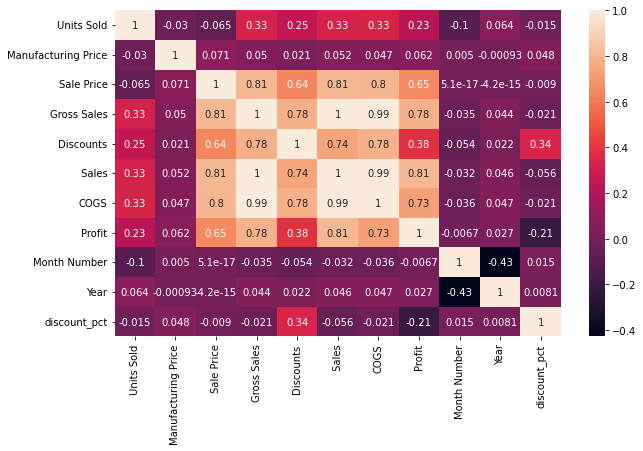

In [13]:
#See if there is correlation 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

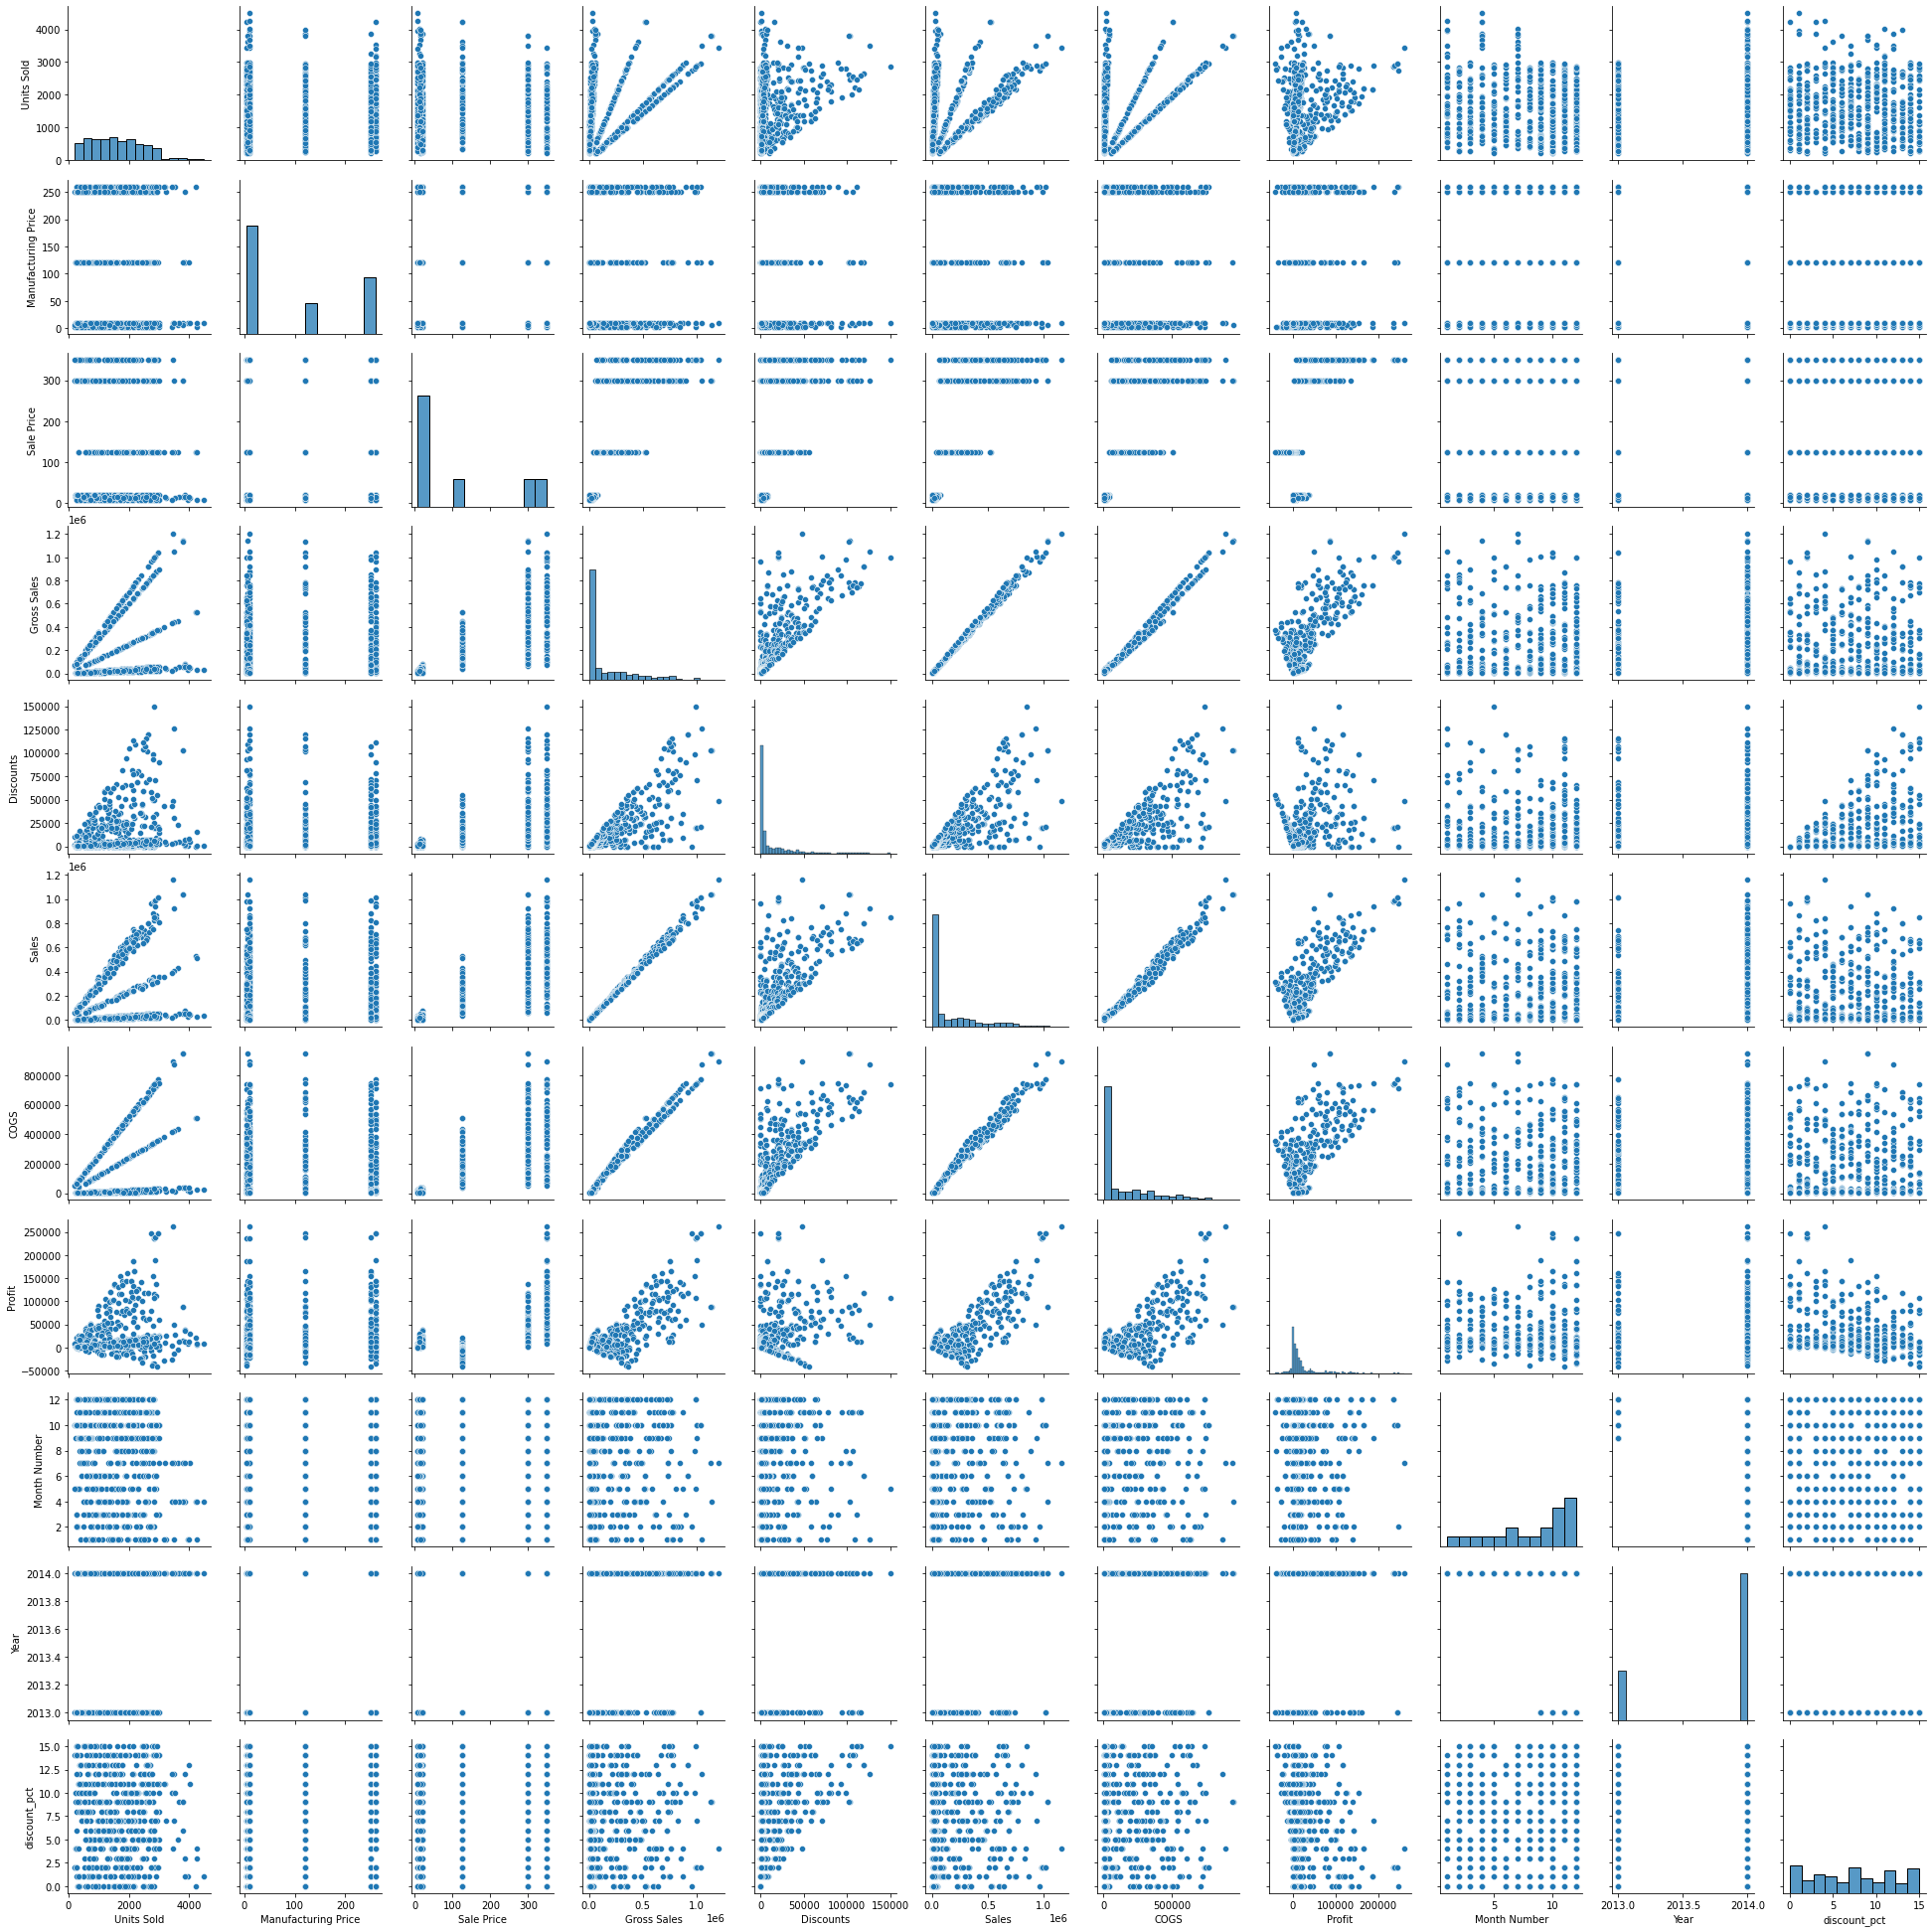

In [14]:
sns.pairplot(df)

## Key Insights:
Since we need to merge two dataframes with the geographical information, we have to perform few data preprocessing steps

In [16]:
df_continent = pd.read_excel(r'C:\Users\ibeme\Downloads\Datasets\Financial Sample.xlsx',sheet_name='Supporting Data',usecols=range(0,2))

In [17]:
df_merged = df.merge(df_continent,how='inner',on='Country')

In [18]:
df_merged

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,discount_pct,band,Continent
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,0.0,None,North America
1,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.0,30216.0,7554.0,22662.0,2014-06-01,6,June,2014,0.0,None,North America
2,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.0,333187.5,319860.0,13327.5,2014-07-01,7,July,2014,0.0,None,North America
3,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.0,43125.0,41400.0,1725.0,2013-10-01,10,October,2013,0.0,None,North America
4,Government,Canada,Paseo,None,292.0,10,20,5840.0,0.0,5840.0,2920.0,2920.0,2014-02-01,2,February,2014,0.0,None,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,United States of America,Velo,High,2574.0,120,300,772200.0,115830.0,656370.0,643500.0,12870.0,2013-11-01,11,November,2013,15.0,High,North America
696,Enterprise,United States of America,Velo,High,2438.0,120,125,304750.0,45712.5,259037.5,292560.0,-33522.5,2013-12-01,12,December,2013,15.0,High,North America
697,Channel Partners,United States of America,Velo,High,914.0,120,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,December,2014,15.0,High,North America
698,Government,United States of America,VTT,High,267.0,250,20,5340.0,801.0,4539.0,2670.0,1869.0,2013-10-01,10,October,2013,15.0,High,North America


### Summarising the sales by Continent,country and product

In [19]:
df_pivot = pd.pivot_table(data=df_merged,values=' Sales',index=['Continent','Country','Product'],aggfunc='sum',margins=True,margins_name='Total')

In [20]:
df_pivot

Sales
Continent     Country                  Product                
Europe        France                   Amarilla   4.016427e+06
                                       Carretera  3.423322e+06
                                       Montana    3.527382e+06
                                       Paseo      5.597751e+06
                                       VTT        3.811194e+06
                                       Velo       3.978096e+06
              Germany                  Amarilla   3.960250e+06
                                       Carretera  3.062341e+06
                                       Montana    3.566044e+06
                                       Paseo      5.229815e+06
                                       VTT        3.293984e+06
                                       Velo       4.392907e+06
North America Canada                   Amarilla   3.855766e+06
                                       Carretera  2.610204e+06
                                       Montana    2.711919e+06
                                       Paseo      7.611521e+06
                                       VTT        4.768754e+06
                                       Velo       3.329490e+06
              Mexico                   Amarilla   3.077555e+06
                                       Carretera  2.879601e+06
                                       Montana    1.941329e+06
                                       Paseo      7.627731e+06
                                       VTT        3.172397e+06
                                       Velo       2.250738e+06
              United States of America Amarilla   2.837117e+06
                                       Carretera  1.839840e+06
                                       Montana    3.644127e+06
                                       Paseo      6.944326e+06
                                       VTT        5.465593e+06
                                       Velo       4.298828e+06
Total                                             1.187264e+08

### Sales Performance:
* Current year, Prev year sales and YOY%
* ALl the KPis by product
* Sales by each month-Monthly sales trend

In [21]:
from datetime import datetime
df_merged['Date'].dt.year

0      2014
1      2014
2      2014
3      2013
4      2014
       ... 
695    2013
696    2013
697    2014
698    2013
699    2014
Name: Date, Length: 700, dtype: int64

In [22]:
sales_by_year=df_merged.groupby(df_merged['Date'].dt.year)[' Sales'].sum()
sales_by_year

Date
2013    26415255.51
2014    92311094.75
Name:  Sales, dtype: float64

In [23]:
max_sales_year = sales_by_year.idxmax()
max_sales_year

2014

In [24]:
#Current year Sales
Curr_year_sales = df_merged[df_merged['Date'].dt.year == df_merged['Date'].dt.year.max()][' Sales'].sum()

In [25]:
#Prev year Sales
prev_year_sales = df_merged[df_merged['Date'].dt.year == ((df_merged['Date'].dt.year.max())-1)][' Sales'].sum()

In [26]:
#YOY
YOY_Rate = round(100.00*(Curr_year_sales-prev_year_sales)/prev_year_sales,2)

In [27]:
df_merged.groupby(['Product', 'Year'])[' Sales'].sum()

Product    Year
Amarilla   2013    3.519133e+06
           2014    1.422798e+07
Carretera  2013    1.406866e+06
           2014    1.240844e+07
Montana    2013    3.975783e+06
           2014    1.141502e+07
Paseo      2013    5.914747e+06
           2014    2.709640e+07
VTT        2013    5.401427e+06
           2014    1.511049e+07
Velo       2013    6.197300e+06
           2014    1.205276e+07
Name:  Sales, dtype: float64

In [28]:
grouped_sales = df_merged.groupby(['Product', 'Year'])[' Sales'].sum().unstack()
grouped_sales

Year,2013,2014
Product,,
Amarilla,3519132.53,1.422798e+07
Carretera,1406865.86,1.240844e+07
Montana,3975783.04,1.141502e+07
Paseo,5914747.09,2.709640e+07
VTT,5401427.23,1.511049e+07
Velo,6197299.76,1.205276e+07


In [42]:
CY_Sales = grouped_sales.max(axis=1)
CY_Sales

Product
Amarilla     1.422798e+07
Carretera    1.240844e+07
Montana      1.141502e+07
Paseo        2.709640e+07
VTT          1.511049e+07
Velo         1.205276e+07
dtype: float64

In [30]:
PY_sales = grouped_sales[grouped_sales.columns[-2]]

In [43]:
grouped_sales

Year,2013,2014
Product,,
Amarilla,3519132.53,1.422798e+07
Carretera,1406865.86,1.240844e+07
Montana,3975783.04,1.141502e+07
Paseo,5914747.09,2.709640e+07
VTT,5401427.23,1.511049e+07
Velo,6197299.76,1.205276e+07


In [46]:
grouped_sales['YOY%']=(100*(CY_Sales - PY_sales)) / PY_sales 

In [47]:
grouped_sales

Year,2013,2014,YOY%
Product,,,
Amarilla,3519132.53,1.422798e+07,304.303714
Carretera,1406865.86,1.240844e+07,781.991836
Montana,3975783.04,1.141502e+07,187.113726
Paseo,5914747.09,2.709640e+07,358.115900
VTT,5401427.23,1.511049e+07,179.750021
Velo,6197299.76,1.205276e+07,94.484052


In [85]:
 df_merged.groupby(df_merged['Date'].dt.month_name())[' Sales'].sum()

Date
April         6964775.07
August        5864622.42
December     17367228.98
February      7297531.39
January       6607761.68
July          8102920.18
June          9518893.82
March         5586859.87
May           6210211.06
November     12651417.50
October      21671431.02
September    10882697.27
Name:  Sales, dtype: float64

In [81]:
# Monthly trend of sales

Monthly_sales = df_merged.groupby(df_merged['Date'].dt.month_name())[' Sales'].sum()
Monthly_sales= Monthly_sales.reset_index()
Monthly_sales.rename(columns={'Date':'Month'},inplace=True)
Monthly_sales

,Month,Sales
0,April,6964775.07
1,August,5864622.42
2,December,17367228.98
3,February,7297531.39
4,January,6607761.68
5,July,8102920.18
6,June,9518893.82
7,March,5586859.87
8,May,6210211.06
9,November,12651417.50


#### Monthly Sales Trend Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

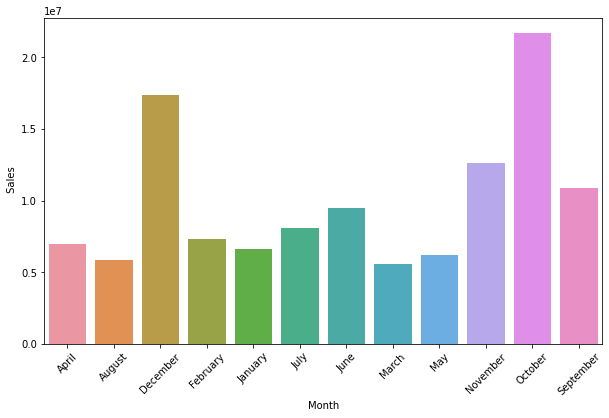

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month',y=' Sales',data=Monthly_sales)
plt.xticks(rotation=45)


#### YOY% by product

In [68]:
grouped_sales

Year,2013,2014,YOY%
Product,,,
Amarilla,3519132.53,1.422798e+07,304.303714
Carretera,1406865.86,1.240844e+07,781.991836
Montana,3975783.04,1.141502e+07,187.113726
Paseo,5914747.09,2.709640e+07,358.115900
VTT,5401427.23,1.511049e+07,179.750021
Velo,6197299.76,1.205276e+07,94.484052


<AxesSubplot:xlabel='Product', ylabel='YOY%'>

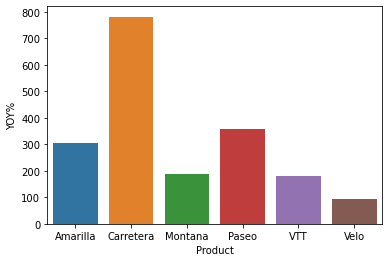

In [74]:
sns.barplot(x=grouped_sales.index,y='YOY%',data=grouped_sales)

### Variance Analysis

In [123]:
df_plan = pd.read_excel(r'C:\Users\ibeme\Downloads\Datasets\Financial Sample.xlsx',sheet_name='Plan',skiprows=1)

In [124]:
df_plan.columns

Index(['Segment', 'Country', 'Product', 'Total'], dtype='object')

In [125]:
df_plan = df_plan.rename(columns = {'Target Table - FY14':'Segment','Unnamed: 1':'Country','Unnamed: 2':'Product','Unnamed: 3':'Target'})

In [126]:
df_plan

,Segment,Country,Product,Total
0,Channel Partners,Canada,Amarilla,7.456709e+04
1,NaN,NaN,Carretera,1.316262e+05
2,NaN,NaN,Montana,6.333990e+04
3,NaN,NaN,Paseo,1.897730e+05
4,NaN,NaN,Velo,4.255100e+04
...,...,...,...,...
176,NaN,NaN,Velo,2.774794e+06
177,NaN,NaN,VTT,3.931718e+06
178,NaN,United States of America Total,NaN,1.374787e+07
179,Small Business Total,NaN,NaN,5.345918e+07


In [129]:
df_plan['Segment']=df_plan['Segment'].fillna(method='ffill')

In [134]:
df_plan['Country']=df_plan['Country'].fillna(method='ffill')

In [139]:
df_plan = df_plan[~df_plan['Segment'].str.contains('Total')]

In [142]:
df_plan = df_plan[~df_plan['Country'].str.contains('Total')]

In [144]:
df_plan.head(40)

,Segment,Country,Product,Total
0,Channel Partners,Canada,Amarilla,7.456709e+04
1,Channel Partners,Canada,Carretera,1.316262e+05
2,Channel Partners,Canada,Montana,6.333990e+04
3,Channel Partners,Canada,Paseo,1.897730e+05
4,Channel Partners,Canada,Velo,4.255100e+04
5,Channel Partners,Canada,VTT,7.368437e+04
7,Channel Partners,France,Amarilla,4.931558e+04
8,Channel Partners,France,Carretera,8.223390e+04
9,Channel Partners,France,Montana,5.984781e+04
10,Channel Partners,France,Paseo,1.194609e+05


In [147]:
final_df = pd.merge(df_merged, df_plan,how='inner',on = ['Segment','Country','Product'])

In [152]:
final_df['Variance'] = final_df[' Sales'] - final_df['Total']

In [157]:
Var_df = final_df.groupby(['Segment','Country','Product']).agg({' Sales':'sum','Total':'max'})

In [159]:
Var_df['Variance']=Var_df.apply(lambda row: row[' Sales'] - row['Total'], axis=1)

In [160]:
Var_df

Sales         Total  \
Segment          Country                  Product                               
Channel Partners Canada                   Amarilla     67177.56  7.456709e+04   
                                          Carretera   110610.24  1.316262e+05   
                                          Montana      55561.32  6.333990e+04   
                                          Paseo       165020.04  1.897730e+05   
                                          VTT          58479.66  7.368437e+04   
...                                                         ...           ...   
Small Business   United States of America Carretera   543015.00  6.407577e+05   
                                          Montana    1425303.00  1.753123e+06   
                                          Paseo      2908284.00  3.693521e+06   
                                          VTT        3095841.00  3.931718e+06   
                                          Velo       2293218.00  2.774794e+06   

                                                        Variance  
Segment          Country                  Product                 
Channel Partners Canada                   Amarilla    -7389.5316  
                                          Carretera  -21015.9456  
                                          Montana     -7778.5848  
                                          Paseo      -24753.0060  
                                          VTT        -15204.7116  
...                                                          ...  
Small Business   United States of America Carretera  -97742.7000  
                                          Montana   -327819.6900  
                                          Paseo     -785236.6800  
                                          VTT       -835877.0700  
                                          Velo      -481575.7800  

[150 rows x 3 columns]